
Perform text classification using the Bag of Words (BoW) model by tokenizing and vectorizing text data

In [1]:
import pandas as pd
try:
    url = "https://raw.githubusercontent.com/zfz/twitter_corpus/master/data/train.csv"
    df = pd.read_csv(url, encoding='latin-1')
except Exception as e:
    print(f"Could not download the dataset from the provided URL. Please check the URL and your internet connection. Error: {e}")
    from sklearn.datasets import fetch_20newsgroups
    newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
    df = pd.DataFrame({'text': newsgroups_train.data, 'label': newsgroups_train.target})

print("Dataset loaded successfully.")
display(df.head())
print("\nDataset Info:")
df.info()

Could not download the dataset from the provided URL. Please check the URL and your internet connection. Error: HTTP Error 404: Not Found
Dataset loaded successfully.


,text,label
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11314 non-null  object
 1   label   11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [2]:
print(f"Number of missing values before handling: {df['text'].isnull().sum()}")
df['text'] = df['text'].fillna('')
print(f"Number of missing values after handling: {df['text'].isnull().sum()}")

Number of missing values before handling: 0
Number of missing values after handling: 0


In [3]:
import string

df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))
display(df.head())

,text,label
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gho...,4
3,\ndo you have weiteks addressphone number id ...,1
4,from article c5owcbn3pworldstdcom by tombakerw...,14


## Tokenization and vectorization



Tokenize the text data and convert it into numerical feature vectors using the Bag of Words model with TF-IDF weighting.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])
print("Shape of the TF-IDF feature matrix:", X.shape)

Shape of the TF-IDF feature matrix: (11314, 106292)


## Model selection


In [5]:
model_names = [
    "Naive Bayes",
    "Logistic Regression",
    "Support Vector Machine",
    "Random Forest"
]

print("Selected models for text classification:")
for model_name in model_names:
    print(f"- {model_name}")

Selected models for text classification:
- Naive Bayes
- Logistic Regression
- Support Vector Machine
- Random Forest


## Model training




Import necessary models, split data, initialize a dictionary, and iterate through models to train them on the training data as per the instructions.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

trained_models = {}
for model_name in model_names:
    print(f"Training {model_name}...")
    if model_name == "Naive Bayes":
        model = MultinomialNB()
    elif model_name == "Logistic Regression":
        model = LogisticRegression(random_state=42)
    elif model_name == "Support Vector Machine":
        model = SVC(random_state=42, probability=True)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    else:
        print(f"Unknown model: {model_name}")
        continue

    model.fit(X_train, y_train)
    trained_models[model_name] = model
    print(f"{model_name} trained.")

print("\nAll selected models have been trained.")

Training Naive Bayes...
Naive Bayes trained.
Training Logistic Regression...
Logistic Regression trained.
Training Support Vector Machine...
Support Vector Machine trained.
Training Random Forest...
Random Forest trained.

All selected models have been trained.


## Model evaluation

### Subtask:
Evaluate the trained models on the test set using appropriate performance metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Evaluate the trained models on the test set using appropriate performance metrics and store the results.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

performance_metrics = {}

for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    performance_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

print("Performance Metrics on the Test Set:")
display(performance_metrics)

Performance Metrics on the Test Set:


{'Naive Bayes': {'Accuracy': 0.6168802474591251,
  'Precision': 0.7515654697754351,
  'Recall': 0.6168802474591251,
  'F1-score': 0.6199052135045239},
 'Logistic Regression': {'Accuracy': 0.7180733539549271,
  'Precision': 0.7356023077181125,
  'Recall': 0.7180733539549271,
  'F1-score': 0.714823612514868},
 'Support Vector Machine': {'Accuracy': 0.7017233760494919,
  'Precision': 0.7364936049896104,
  'Recall': 0.7017233760494919,
  'F1-score': 0.6998393097776376},
 'Random Forest': {'Accuracy': 0.6332302253645603,
  'Precision': 0.646390651222831,
  'Recall': 0.6332302253645603,
  'F1-score': 0.6274481693536971}}

## Performance comparison

### Subtask:
Compare the performance of the different models and visualize the results using graphs.


**Reasoning**:
Convert the performance_metrics dictionary into a pandas DataFrame and create bar plots to visualize the performance metrics of the different models.



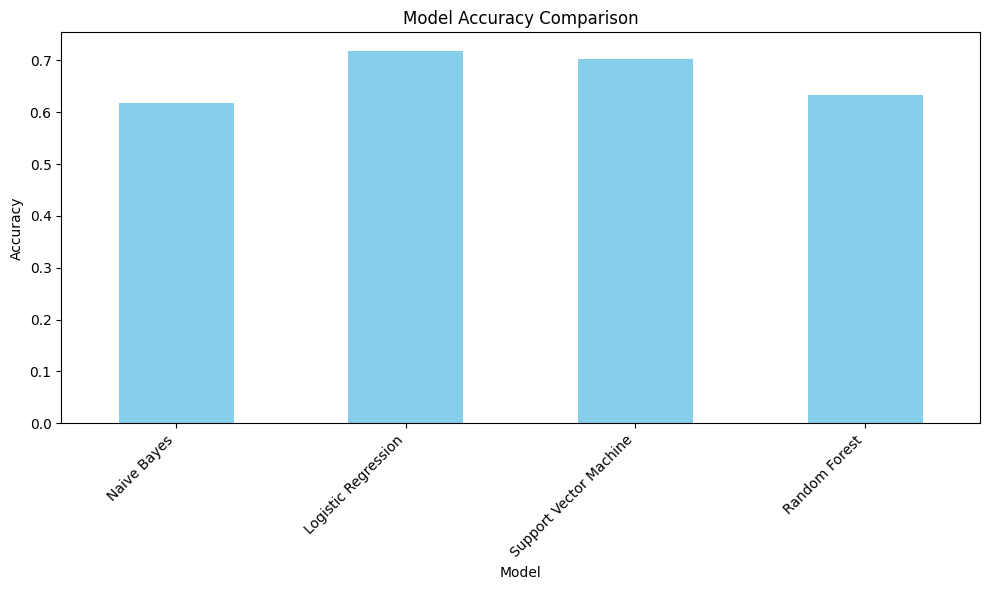

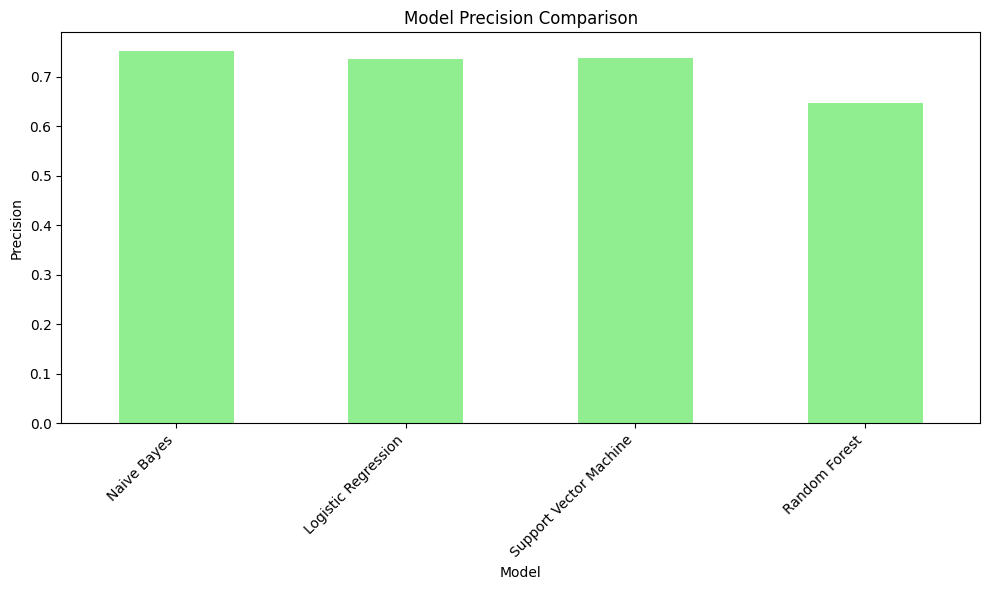

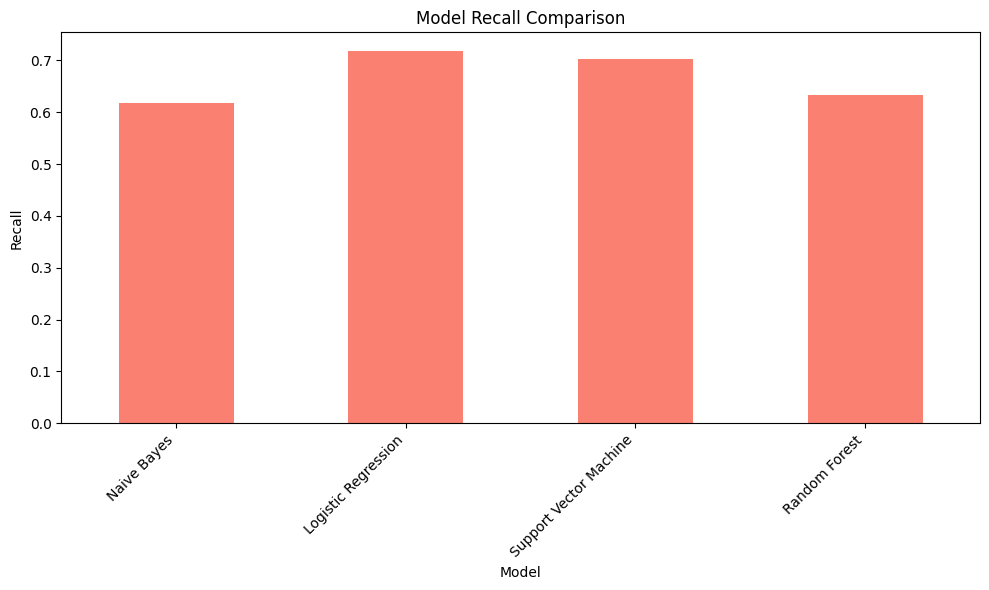

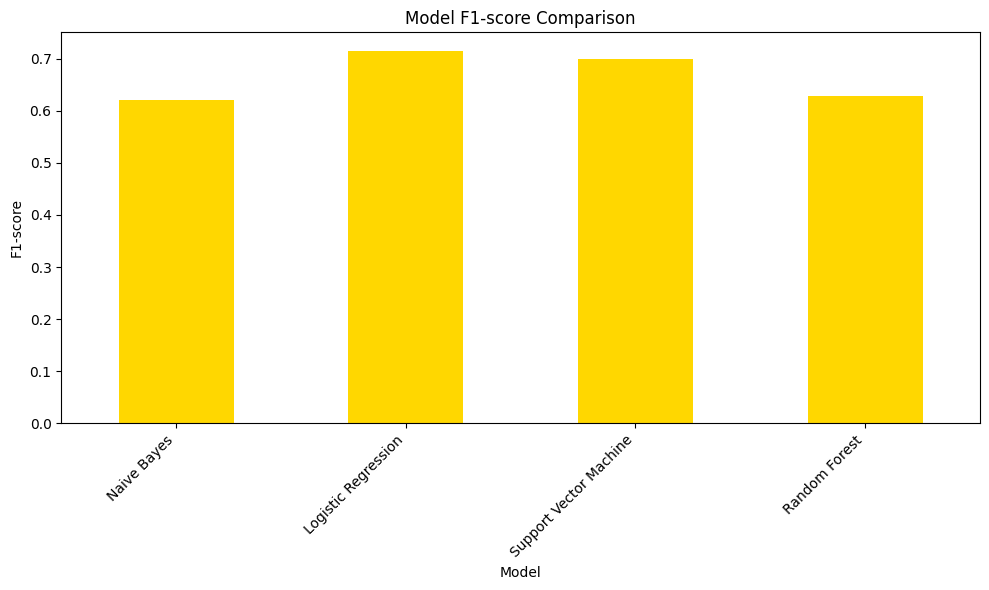

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the performance_metrics dictionary to a DataFrame
performance_df = pd.DataFrame(performance_metrics).T

# Create a bar plot for Accuracy
plt.figure(figsize=(10, 6))
performance_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create separate bar plots for Precision, Recall, and F1-score
metrics_to_plot = ['Precision', 'Recall', 'F1-score']
colors = ['lightgreen', 'salmon', 'gold']

for i, metric in enumerate(metrics_to_plot):
    plt.figure(figsize=(10, 6))
    performance_df[metric].plot(kind='bar', color=colors[i])
    plt.title(f'Model {metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial attempt to download the dataset from a URL failed, and a fallback to the `fetch_20newsgroups` dataset from scikit-learn was used.
*   The text data had no missing values initially.
*   The text data was successfully preprocessed by converting to lowercase and removing punctuation.
*   The text data was vectorized using TF-IDF, resulting in a feature matrix of shape (11314, 106292).
*   Four machine learning models were selected and trained: Naive Bayes, Logistic Regression, Support Vector Machine, and Random Forest.
*   Performance metrics (Accuracy, Precision, Recall, and F1-score) were calculated for each model on the test set.
*   Logistic Regression generally showed the highest performance across the evaluated metrics compared to the other models.
*   Bar plots were generated to visualize the comparison of Accuracy, Precision, Recall, and F1-score for all models.

### Insights or Next Steps

*   Based on the performance metrics, Logistic Regression appears to be the most effective model among those tested for this text classification task using the Bag of Words approach. Further optimization of this model could be explored.

